In [2]:
import math

def f(x):
  return 1/math.exp(x**2)*math.cos(5*x) - 0.1
print("(a)", f(0))
print("(b) {:5.4f}".format(f(-1.408)))
print("(c) {:5.4f}".format(f(-1.408176)))
print("(d)\n{:5.4f}".format(f(-1.6)))
print("{:5.4f}".format(f(-1.4)))

(a) 0.9
(b) 0.0001
(c) 0.0000
(d)
-0.1112
0.0062


In [3]:
print(f"{f(-1.46)} -> {f(-1.39)}")

-0.03758231970356801 -> 0.013817564707581678


In [4]:
def crossing_finder(f,start=-10,end=10,n=100):
  r = end - start
  x_list = [i / n * r + start for i in range(n)]
  y_list = [f(x) for x in x_list]
  prev_x = x_list[0]
  prev_y = y_list[0]
  crossing_list = []
  for i in range(1,n):
    x = x_list[i]
    y = y_list[i]
    if prev_y * y < 0:
      crossing_list.append((prev_x,x))
    prev_x = x
    prev_y = y
  return crossing_list

In [5]:
print("(a)")
f = lambda x: 1/math.exp(x**2)*math.cos(5*x) - 0.1
c = crossing_finder(f)
for (start,end) in c:
  print("({:6.4f},{:6.4f})".format(start,end))

print("(b)")
def zero_finder(f,start,end,eps=1E-9):
  x = (start + end)/2
  y1 = f(start)
  y = f(x)
  y2 = f(end)
  if math.fabs(y) < eps:
    return x
  elif y1*y < 0:
    return zero_finder(f,start,x,eps)
  else:
    return zero_finder(f,x,end,eps)

ans_list = []
for (start,end) in c:
  ans_list.append(zero_finder(f,start,end))

for i in range(len(ans_list)):
  ans = ans_list[i]
  print("ans[{1}] = {0:6.4f}".format(ans,i))


(a)
(-1.6000,-1.4000)
(-1.0000,-0.8000)
(-0.4000,-0.2000)
(0.2000,0.4000)
(0.8000,1.0000)
(1.4000,1.6000)
(b)
ans[0] = -1.4082
ans[1] = -0.9972
ans[2] = -0.2923
ans[3] = 0.2923
ans[4] = 0.9972
ans[5] = 1.4082


In [2]:
from skimage import novice,data

class MyPic:
  def __init__(self,filename):
    self.pic = novice.open(data.data_dir + "/" + filename)
  
  def threshold(self,p):
    if p > 255:
      return 255
    else:
      return int(p)

  def show(self):
    self.pic.show()
  
  def sum(self):
    (r,g,b,a) = (0,0,0,0)
    for p in self.pic:
      r += p.red
      g += p.green
      b += p.blue
      a += p.alpha
    return (r,g,b,a)
  
  def grey(self):
    for p in self.pic:
      (r,g,b) = (p.red, p.green, p.blue)
      grey = self.threshold((r + g + b)/3)
      (p.red,p.green,p.blue)=(grey,grey,grey)


(a)


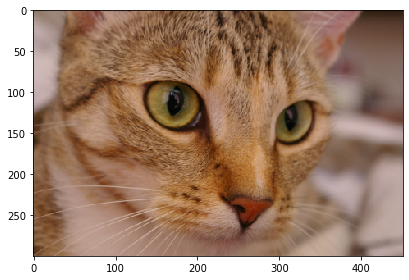

A. Cat
(b) (19980169, 15078438, 11743750, 34501500)
(c) 81303857
(d)


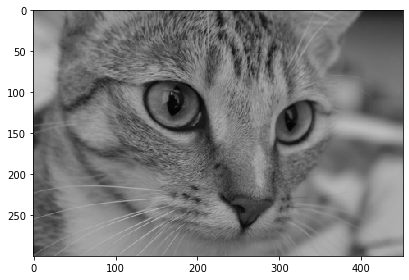

B. The picture changed to black and white
(e) (15554511, 15554511, 15554511, 34501500)
(f) 81165033


In [4]:
print("(a)")
pic = MyPic("chelsea.png")
pic.show()
print("A. Cat")
# A. Cat
# B. Coffee
# C. Sky
# D. Car

print("(b)", end=" ")
pic = MyPic("chelsea.png")
print(pic.sum())

print("(c)", end=" ")
pic = MyPic("chelsea.png")
print(sum(pic.sum()))

print("(d)")
pic = MyPic("chelsea.png")
pic.grey()
pic.show()
print("B. The picture changed to black and white")

print("(e)", end=" ")
pic = MyPic("chelsea.png")
pic.grey()
print(pic.sum())

print("(f)", end=" ")
pic = MyPic("chelsea.png")
pic.grey()
print(sum(pic.sum()))

In [12]:
%pip install scikit-image==0.14.5

     |████████████████████████████████| 28.9 MB 7.3 MB/s eta 0:00:01     |███████████████████████████▉    | 25.1 MB 7.3 MB/s eta 0:00:01
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.17.2
    Uninstalling scikit-image-0.17.2:
      Successfully uninstalled scikit-image-0.17.2
Note: you may need to restart the kernel to use updated packages.


In [6]:
print("(a)")
for i in range(5):
    x = 0
    try:
        y = 3/x
    except Exception as e:
        print(e)
        break
print("(b)")
for i in range(5):
    try:
        x = 0
        y = 3/x
    except Exception:
        print("Something wrong")

(a)
division by zero
(b)
Something wrong
Something wrong
Something wrong
Something wrong
Something wrong


In [7]:
print("(a)", end=" ")
import math

class Vector2:
  def __init__(self,x,y):
    self._x = x
    self._y = y
  
  def x(self):
    return self._x
  
  def y(self):
    return self._y
  
  def size(self):
    return math.sqrt(self.x()**2 + self.y()**2)

v1 = Vector2(1,1)
print(v1.size())

print("(b)")
import math

class Vector3:
  def __init__(self,x,y):
    self._x = x
    self._y = y
  
  def x(self):
    return self._x
  
  def y(self):
    return self._y
  
  def __sub__(self,other):
    return Vector3(self.x() - other.x(), self.y() - other.y())
  
  def __repr__(self):
    return "Vector3({},{})".format(self.x(),self.y())

  def size(self):
    return math.sqrt(self.x()**2 + self.y()**2)

v1 = Vector3(1,0)
v2 = Vector3(0,1)
v = v1 - v2
print(v)
print(v.size())

print("(c)", end=" ")
import math

class Vector3:
  def __init__(self,x,y):
    self._x = x
    self._y = y
  
  def x(self):
    return self._x
  
  def y(self):
    return self._y
  
  def __sub__(self,other):
    return Vector3(self.x() - other.x(), self.y() - other.y())
  
  def __repr__(self):
    return "Vector3({},{})".format(self.x(),self.y())
  
  def size(self):
    return math.sqrt(self.x()**2 + self.y()**2)

class Point2(Vector3):
  def __init__(self,x,y):
    super().__init__(x,y)
  
  def distance(self,other):
    v = self - other
    return v.size()

p1 = Point2(1,0)
p2 = Point2(0,1)
print(p1.distance(p2))

(a) 1.4142135623730951
(b)
Vector3(1,-1)
1.4142135623730951
(c) 1.4142135623730951
